<a href="https://colab.research.google.com/github/anne-ananya/MLsample/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
customers_path = '/content/drive/MyDrive/Customers.csv'
products_path = '/content/drive/MyDrive/Products.csv'
transactions_path = '/content/drive/MyDrive/Transactions.csv'

# Load the CSV files into Pandas DataFrames
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

Mounted at /content/drive


In [6]:
print("Customers Data:")
print(customers.info())
print(customers.head())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [7]:
print("\nProducts Data:")
print(products.info())
print(products.head())


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [8]:

print("\nTransactions Data:")
print(transactions.info())
print(transactions.head())



Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  

In [9]:
print("\nMissing Values in Customers Data:")
print(customers.isnull().sum())



Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [10]:
print("\nMissing Values in Products Data:")
print(products.isnull().sum())


Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [11]:
print("\nMissing Values in Transactions Data:")
print(transactions.isnull().sum())


Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [12]:
# Merge Transactions with Customers on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [13]:
# Merge the result with Products on ProductID
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

In [14]:
# Display merged data
print("\nMerged Data:")
print(merged_data.head())


Merged Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Blu

In [15]:
# Convert TransactionDate and SignupDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

In [16]:
# Add a new column for transaction month
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')

In [17]:
# Basic statistics
print("\nBasic Statistics for Transactions:")
print(merged_data['TotalValue'].describe())


Basic Statistics for Transactions:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [18]:
# Total revenue
total_revenue = merged_data['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")



Total Revenue: $689,995.56


In [19]:
# Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(revenue_by_region)



Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [20]:
# Top 10 customers by total spend
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Spend:")
print(top_customers)


Top 10 Customers by Total Spend:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [21]:
# Top 10 products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)



Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [22]:
# Revenue trend over time
revenue_trend = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
print("\nRevenue Trend Over Time:")
print(revenue_trend)



Revenue Trend Over Time:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [23]:
# Visualizations
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-24-6b3fe16bcea4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Asia')])

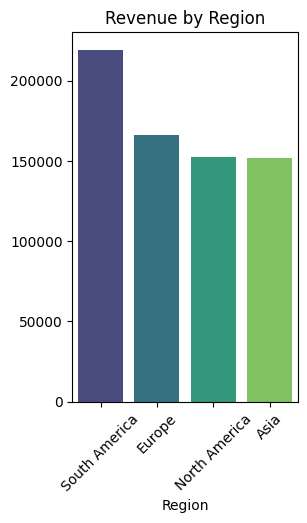

In [24]:
# Revenue by region
plt.subplot(1, 2, 1)
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='viridis')
plt.title('Revenue by Region')
plt.xticks(rotation=45)

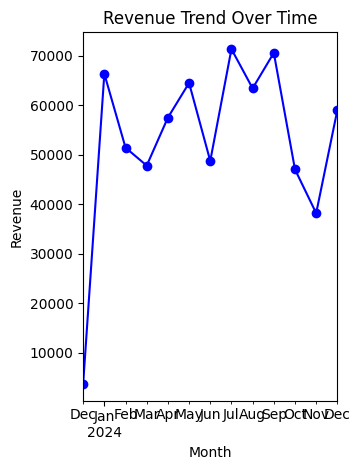

In [25]:
# Revenue trend over time
plt.subplot(1, 2, 2)
revenue_trend.plot(kind='line', marker='o', color='b')
plt.title('Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


<ipython-input-26-7a273c6741c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='Set2')


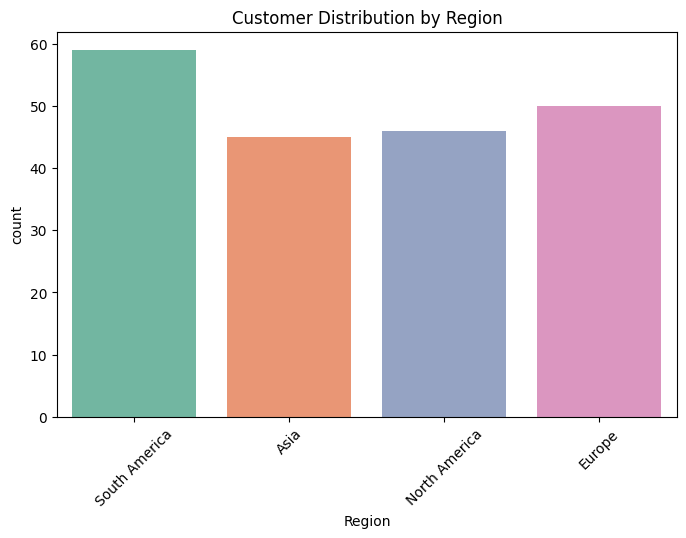

In [26]:
# Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-4f45c01cabf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products, palette='Set3')


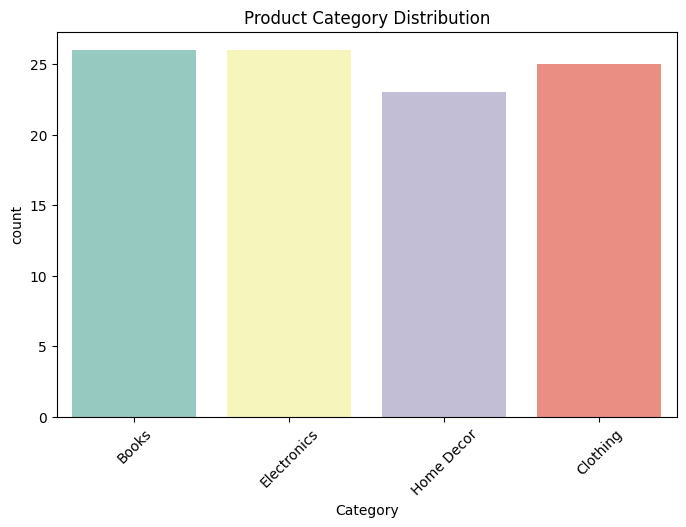

In [27]:

# Product category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=products, palette='Set3')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Feature Engineering
# Create customer profiles based on their transaction history
customer_features = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),  # Total spend by customer
    avg_order_value=('TotalValue', 'mean'),  # Average order value
    purchase_frequency=('TransactionID', 'count'),  # Number of transactions
    favorite_category=('Category', lambda x: x.mode()[0])  # Most purchased category
).reset_index()

In [29]:
# Add customer profile information (Region and SignupDate)
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')

In [30]:
# Convert SignupDate to tenure (days since signup)
customer_features['SignupDate'] = pd.to_datetime(customer_features['SignupDate'])
customer_features['Tenure'] = (pd.Timestamp.now() - customer_features['SignupDate']).dt.days

In [31]:
# Encode categorical features (Region and favorite_category)
customer_features = pd.get_dummies(customer_features, columns=['Region', 'favorite_category'], drop_first=True)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [33]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['total_spend', 'avg_order_value', 'purchase_frequency', 'Tenure']
customer_features[numerical_features] = scaler.fit_transform(customer_features[numerical_features])

In [34]:
# Ensure all columns are numerical
customer_features = customer_features.select_dtypes(include=[np.number])

In [35]:
# Compute similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(customer_features)

In [36]:
# Create a DataFrame for similarity scores
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features.index, columns=customer_features.index)

In [37]:
# Function to get top 3 lookalikes for a given customer
def get_top_lookalikes(customer_id, similarity_df, top_n=3):
    # Get similarity scores for the given customer
    similarities = similarity_df[customer_id].sort_values(ascending=False)
    # Exclude the customer itself
    similarities = similarities[similarities.index != customer_id]
    # Return top N lookalikes with scores
    return similarities.head(top_n).reset_index().values.tolist()


In [38]:
# Generate lookalikes for the first 20 customers (C0001 - C0020)
lookalike_map = {}
for customer_id in customer_features.index[:20]:
    lookalikes = get_top_lookalikes(customer_id, similarity_df)
    lookalike_map[customer_id] = lookalikes

In [39]:
# Save results to Lookalike.csv
lookalike_df = pd.DataFrame.from_dict(lookalike_map, orient='index')
lookalike_df = lookalike_df.explode(0).reset_index()

# Ensure all values in the '0' column are lists
lookalike_df[0] = lookalike_df[0].apply(lambda x: x if isinstance(x, list) else [np.nan, np.nan])

# Split the list column into two separate columns
lookalike_df[['LookalikeID', 'SimilarityScore']] = pd.DataFrame(
    lookalike_df[0].tolist(),
    index=lookalike_df.index
)

# Drop rows with NaN values (if any)
lookalike_df.dropna(subset=['LookalikeID', 'SimilarityScore'], inplace=True)

# Rename columns
lookalike_df = lookalike_df[['index', 'LookalikeID', 'SimilarityScore']]
lookalike_df.columns = ['CustomerID', 'LookalikeID', 'SimilarityScore']

# Save to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the Lookalike.csv
print(lookalike_df.head(10))

Empty DataFrame
Columns: [CustomerID, LookalikeID, SimilarityScore]
Index: []


In [40]:
print(customer_features.head())

   total_spend  avg_order_value  purchase_frequency    Tenure
0    -0.061701        -0.070263           -0.011458  1.148752
1    -0.877744        -0.934933           -0.467494  1.600431
2    -0.405857        -0.026271           -0.467494 -0.713270
3     1.032547        -0.076769            1.356650  0.869141
4    -0.783929        -0.040028           -0.923530  1.038137


In [41]:
print(similarity_matrix[:5, :5])  # Print a small portion of the matrix
print(np.sum(similarity_matrix, axis=1))  # Check row sums


[[ 1.          0.80996075 -0.72277974  0.41883697  0.6819187 ]
 [ 0.80996075  1.         -0.27281199 -0.01930326  0.83970395]
 [-0.72277974 -0.27281199  1.         -0.92355386  0.00695529]
 [ 0.41883697 -0.01930326 -0.92355386  1.         -0.37854861]
 [ 0.6819187   0.83970395  0.00695529 -0.37854861  1.        ]]
[-1.75838651  1.69114974  4.36848249 -4.34061699  1.69918115 -2.30774319
 -0.56728487 -0.4770227   5.13941199  3.82427482 -3.73827251 -2.07952711
 -3.62005633  5.32451721  4.94295001 -1.20509929 -1.95146806 -1.73385006
  2.81182357  3.17306254 -4.16423217 -4.18033626 -5.04819889  1.13854292
  2.91074729  0.18377969  1.64812585 -3.71587508  2.16255985  5.09466608
  5.52235099  5.43641547  5.29057045  2.95469132  4.10287341  4.90665727
 -5.01758746  0.28444802  0.17905388 -3.13921139 -4.53818021  1.5077042
  4.4431243   0.03818085 -5.37835014 -2.27212427  2.85864325  0.89859907
  3.09608094  0.10600656 -4.25869403  5.19128998 -5.42797104 -4.02068293
  3.76829064  3.5425707  -1.

In [42]:
print(customer_features.columns)

Index(['total_spend', 'avg_order_value', 'purchase_frequency', 'Tenure'], dtype='object')


In [43]:
customer_features = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),  # Total spend by customer
    avg_order_value=('TotalValue', 'mean'),  # Average order value
    purchase_frequency=('TransactionID', 'count'),  # Number of transactions
    favorite_category=('Category', lambda x: x.mode()[0])  # Most purchased category
).reset_index()

In [44]:
similarity_df = pd.DataFrame(similarity_matrix,
                              index=customer_features['CustomerID'],
                              columns=customer_features['CustomerID'])
print(similarity_df.head())

CustomerID     C0001     C0002     C0003     C0004     C0005     C0006  \
CustomerID                                                               
C0001       1.000000  0.809961 -0.722780  0.418837  0.681919 -0.363713   
C0002       0.809961  1.000000 -0.272812 -0.019303  0.839704 -0.661732   
C0003      -0.722780 -0.272812  1.000000 -0.923554  0.006955  0.232396   
C0004       0.418837 -0.019303 -0.923554  1.000000 -0.378549 -0.232769   
C0005       0.681919  0.839704  0.006955 -0.378549  1.000000 -0.180172   

CustomerID     C0007     C0008     C0009     C0010  ...     C0191     C0192  \
CustomerID                                          ...                       
C0001       0.683856 -0.200575  0.044383  0.471628  ... -0.830980  0.693724   
C0002       0.574359 -0.235681  0.621006  0.898092  ... -0.368004  0.982461   
C0003      -0.155132 -0.331716  0.496798  0.103566  ...  0.795626 -0.089651   
C0004      -0.223398  0.626827 -0.588721 -0.302626  ... -0.538530 -0.192828   
C0005  

In [45]:
for customer_id in customer_features['CustomerID'].unique()[:5]:
    lookalikes = get_top_lookalikes(customer_id, similarity_df)
    print(f"Customer: {customer_id}, Lookalikes: {lookalikes}")

Customer: C0001, Lookalikes: [['C0152', 0.9993185557953671], ['C0160', 0.9646622803398666], ['C0118', 0.9416425874949189]]
Customer: C0002, Lookalikes: [['C0029', 0.9955513590865488], ['C0192', 0.9824606718770172], ['C0086', 0.9719439019453344]]
Customer: C0003, Lookalikes: [['C0036', 0.9807756633543862], ['C0177', 0.9767476899003709], ['C0144', 0.975820508679136]]
Customer: C0004, Lookalikes: [['C0175', 0.9969460924622949], ['C0173', 0.9880005077624013], ['C0165', 0.9855822114426875]]
Customer: C0005, Lookalikes: [['C0073', 0.9997021390313776], ['C0159', 0.999215291935641], ['C0112', 0.9970747875356132]]


In [46]:
# Define the function to get top N lookalikes for a given customer
def get_top_lookalikes(customer_id, similarity_df, top_n=3):
    # Get similarity scores for the given customer
    similarities = similarity_df[customer_id].sort_values(ascending=False)
    # Exclude the customer itself
    similarities = similarities[similarities.index != customer_id]
    # Return top N lookalikes with scores
    return similarities.head(top_n).reset_index().values.tolist()

# Generate lookalikes for the first 20 customers
lookalike_map = {}
for customer_id in customer_features['CustomerID'].unique()[:20]:  # Get first 20 customers
    lookalikes = get_top_lookalikes(customer_id, similarity_df)
    lookalike_map[customer_id] = lookalikes

# Debugging Step: Check the lookalike_map
print("Lookalike Map Sample:")
print(list(lookalike_map.items())[:5])  # Print the first 5 entries for debugging

# Create a DataFrame from the dictionary
lookalike_df = pd.DataFrame.from_dict(lookalike_map, orient='index')

# Explode nested lists into rows
lookalike_df = lookalike_df.stack().reset_index(level=1, drop=True).reset_index()

# Debugging Step: Check intermediate DataFrame
print("Exploded DataFrame Sample:")
print(lookalike_df.head())

# Ensure all values in the column are lists and split them into separate columns
lookalike_df[0] = lookalike_df[0].apply(lambda x: x if isinstance(x, list) else [np.nan, np.nan])
lookalike_df[['LookalikeID', 'SimilarityScore']] = pd.DataFrame(
    lookalike_df[0].tolist(), index=lookalike_df.index
)

# Drop rows with NaN values
lookalike_df.dropna(subset=['LookalikeID', 'SimilarityScore'], inplace=True)

# Rename columns
lookalike_df = lookalike_df[['index', 'LookalikeID', 'SimilarityScore']]
lookalike_df.columns = ['CustomerID', 'LookalikeID', 'SimilarityScore']

# Save results to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display a sample of the final DataFrame
print("Final Lookalike DataFrame:")
print(lookalike_df.head(10))


Lookalike Map Sample:
[('C0001', [['C0152', 0.9993185557953671], ['C0160', 0.9646622803398666], ['C0118', 0.9416425874949189]]), ('C0002', [['C0029', 0.9955513590865488], ['C0192', 0.9824606718770172], ['C0086', 0.9719439019453344]]), ('C0003', [['C0036', 0.9807756633543862], ['C0177', 0.9767476899003709], ['C0144', 0.975820508679136]]), ('C0004', [['C0175', 0.9969460924622949], ['C0173', 0.9880005077624013], ['C0165', 0.9855822114426875]]), ('C0005', [['C0073', 0.9997021390313776], ['C0159', 0.999215291935641], ['C0112', 0.9970747875356132]])]
Exploded DataFrame Sample:
   index                            0
0  C0001  [C0152, 0.9993185557953671]
1  C0001  [C0160, 0.9646622803398666]
2  C0001  [C0118, 0.9416425874949189]
3  C0002  [C0029, 0.9955513590865488]
4  C0002  [C0192, 0.9824606718770172]
Final Lookalike DataFrame:
  CustomerID LookalikeID  SimilarityScore
0      C0001       C0152         0.999319
1      C0001       C0160         0.964662
2      C0001       C0118         0.941643

In [55]:
# Step 1: Perform K-Means Clustering
# Decide on the number of clusters (let's start with 4 as an example)
numerical_features = ['total_spend', 'avg_order_value', 'purchase_frequency']

kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[numerical_features])

In [57]:

db_index = davies_bouldin_score(customer_features[numerical_features], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.6022910408086608


In [58]:
silhouette = silhouette_score(customer_features[numerical_features], customer_features['Cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.49625883499054974


In [59]:
# Step 3: PCA for Visualization (Reduce to 2D for easier plotting)
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(customer_features[numerical_features])
customer_features['PCA1'], customer_features['PCA2'] = reduced_data[:, 0], reduced_data[:, 1]

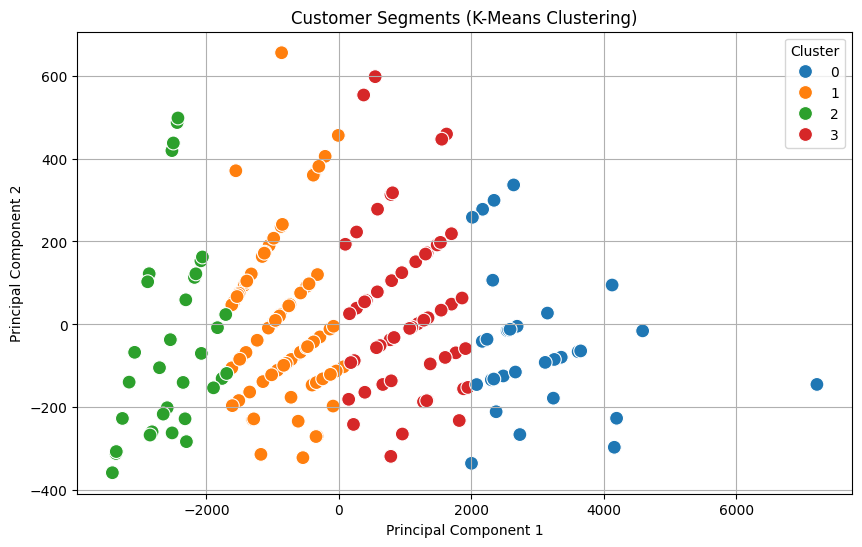

In [60]:
# Step 4: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()